In [1]:
import pandas as pd 
import numpy as np 

In [2]:
df = pd.read_csv(r'C:\Users\A7590\OneDrive\桌面\StockX-Data-Contest-2019-3.csv')
print(df.head())
print(df.shape)
r = {}
for c in df.columns:
    r[c] = df[c].isna().value_counts()
print(r)
df.shape
df['Brand'].value_counts()

  Order Date   Brand                                   Sneaker Name  \
0     9/1/17   Yeezy           Adidas-Yeezy-Boost-350-Low-V2-Beluga   
1     9/1/17   Yeezy    Adidas-Yeezy-Boost-350-V2-Core-Black-Copper   
2     9/1/17   Yeezy     Adidas-Yeezy-Boost-350-V2-Core-Black-Green   
3     9/1/17   Yeezy       Adidas-Yeezy-Boost-350-V2-Core-Black-Red   
4     9/1/17   Yeezy  Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017   

  Sale Price Retail Price Release Date  Shoe Size  Buyer Region  
0     $1,097         $220      9/24/16       11.0    California  
1       $685         $220     11/23/16       11.0    California  
2       $690         $220     11/23/16       11.0    California  
3     $1,075         $220     11/23/16       11.5      Kentucky  
4       $828         $220      2/11/17       11.0  Rhode Island  
(99956, 8)
{'Order Date': False    99956
Name: Order Date, dtype: int64, 'Brand': False    99956
Name: Brand, dtype: int64, 'Sneaker Name': False    99956
Name: Sneaker Name, dt

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64

In [3]:
# data cleaning
list1 = ['Sale Price','Retail Price']
for col in list1:
    df[col] = df[col].apply(lambda x:x.replace('$',''))
    df[col] = df[col].apply(lambda x:x.replace(',',''))
    df[col] = df[col].apply(lambda _:int(_))

In [4]:
list2 = ['Order Date', 'Release Date']
for date in list2:
    df[date] = df[date].apply(lambda _: pd.to_datetime(_,format = '%m/%d/%y'))
df['Release Month'] = df['Release Date'].dt.month
df['Order Month'] = df['Order Date'].dt.month


In [5]:
def get_color(sneak_name):
    color_map = ['Beluga','Black','White','Zebra','Moonrock','Oxford-Tan','Turtledove','Yellow','Blue',
                'Orange','Butter','Rose','Hallows','Sesame','Static',
                'Desert','Silver','Chicago','Pink','Gray','Red','Abloh','Reaper','Menta','Volt']
    split = sneak_name.split('-')
    for i in range(len(split)-1):
        if split[i] == 'Off':
            if split[i+1] == 'White':
               split.remove(split[i+1])
    for n in split:
        if n in color_map:
            if n == 'Beluga':
                n = 'Gray'
                return n
            elif n =='Moonrock':
                n= 'Gray'
                return n
            elif n == 'Oxford-Tan':
                n= 'Gray'
                return n
            elif n == 'Turtledove':
                n= 'Gray'
                return n
            elif n == 'Butter':
                n= 'Yellow'
                return n
            elif n == 'Rose':
                n= 'Red'
                return n
            elif n== 'Hallows':
                n= 'Yellow'
                return n
            elif n == 'Chicago':
                n= 'Red'
                return n
            elif n == 'All-Hallows-Eve':
                n= 'Yellow'
                return n
            elif n =='Sesame':
                n= 'Gray'
                return n
            elif n =='Static':
                n= 'Silver'
                return n
            elif n =='Abloh':
                n= 'White'
                return n
            elif n == 'Reaper':
                n= 'Black'
                return n
            elif n == 'Menta':
                n= 'Gray'
                return n
            elif n == 'Volt':
                n= 'Green'
                return n
            else:
                return n
    return 'White'
df['color'] = df['Sneaker Name'].apply(get_color)
df.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Release Month,Order Month,color
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California,9,9,Gray
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California,11,9,Black
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California,11,9,Black
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky,11,9,Black
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island,2,9,Black


In [6]:
####EDA###################
print(df[df['Brand']==' Yeezy']['Sale Price'].mean())
print(df[df['Brand']=='Off-White']['Sale Price'].mean())

360.03255175854326
671.4812909260992


In [7]:
import matplotlib.pyplot as plt
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     99956 non-null  datetime64[ns]
 1   Brand          99956 non-null  object        
 2   Sneaker Name   99956 non-null  object        
 3   Sale Price     99956 non-null  int64         
 4   Retail Price   99956 non-null  int64         
 5   Release Date   99956 non-null  datetime64[ns]
 6   Shoe Size      99956 non-null  float64       
 7   Buyer Region   99956 non-null  object        
 8   Release Month  99956 non-null  int64         
 9   Order Month    99956 non-null  int64         
 10  color          99956 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 8.4+ MB


In [8]:
#Plot One Column 

count                   99956
unique                    531
top       2018-11-16 00:00:00
freq                     1388
first     2017-09-01 00:00:00
last      2019-02-13 00:00:00
Name: Order Date, dtype: object 

 Yeezy       72162
Off-White    27794
Name: Brand, dtype: int64 

adidas-Yeezy-Boost-350-V2-Butter                     11423
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0                10395
Adidas-Yeezy-Boost-350-V2-Zebra                      10110
Adidas-Yeezy-Boost-350-V2-Blue-Tint                   9297
Adidas-Yeezy-Boost-350-V2-Cream-White                 9097
Adidas-Yeezy-Boost-350-V2-Sesame                      5553
adidas-Yeezy-Boost-350-V2-Static                      4983
Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow          4854
Air-Jordan-1-Retro-High-Off-White-University-Blue     4635
adidas-Yeezy-Boost-350-V2-Static-Reflective           3184
Nike-Air-Presto-Off-White-Black-2018                  1884
Nike-Air-Presto-Off-White-White-2018                  1883
Nike-Air-Vap

C:\Users\A7590\AppData\Local\Temp/ipykernel_17068/1626952344.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  print(df[col].describe(),'\n')


count    99956.00000
mean       208.61359
std         25.20001
min        130.00000
25%        220.00000
50%        220.00000
75%        220.00000
max        250.00000
Name: Retail Price, dtype: float64 

count                   99956
unique                     35
top       2018-06-30 00:00:00
freq                    11423
first     2015-06-27 00:00:00
last      2019-02-07 00:00:00
Name: Release Date, dtype: object 

10.0    11093
9.0      9706
11.0     9251
10.5     8784
9.5      8685
12.0     7297
8.0      5363
8.5      5300
13.0     4602
11.5     4502
6.0      4013
7.0      3867
5.0      3577
7.5      2664
5.5      2621
4.0      2241
6.5      2219
14.0     1791
4.5      1304
12.5      628
13.5      147
15.0      130
14.5       84
16.0       79
17.0        4
3.5         4
Name: Shoe Size, dtype: int64 

California              19349
New York                16525
Oregon                   7681
Florida                  6376
Texas                    5876
New Jersey               4720
Ill

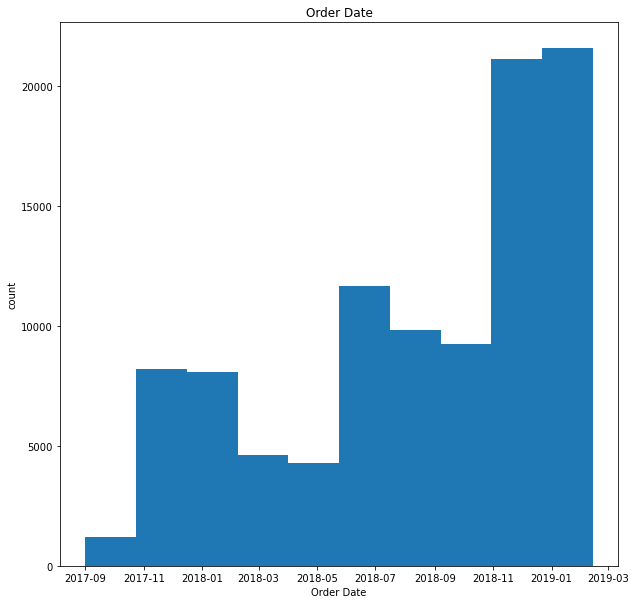

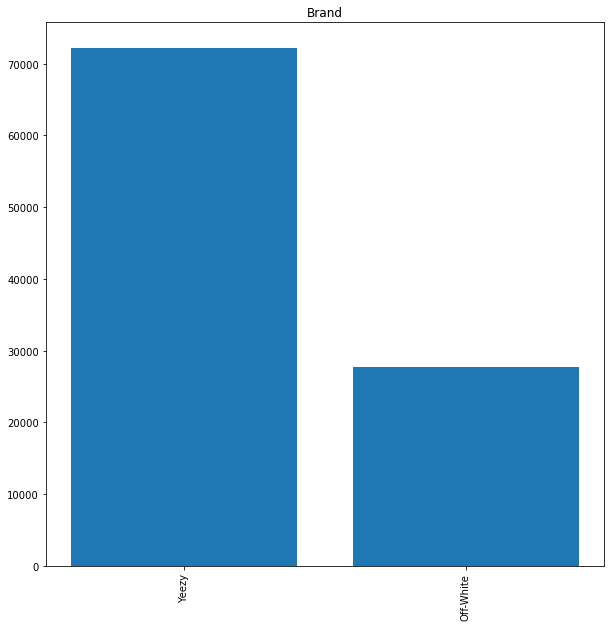

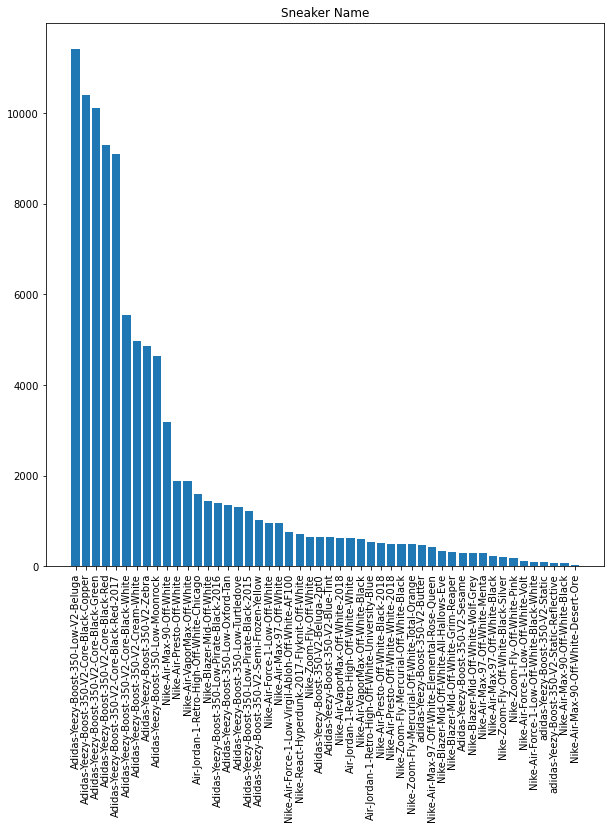

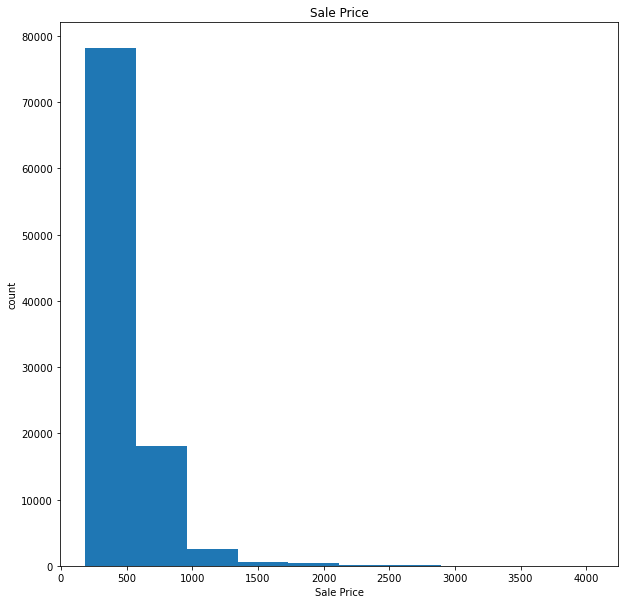

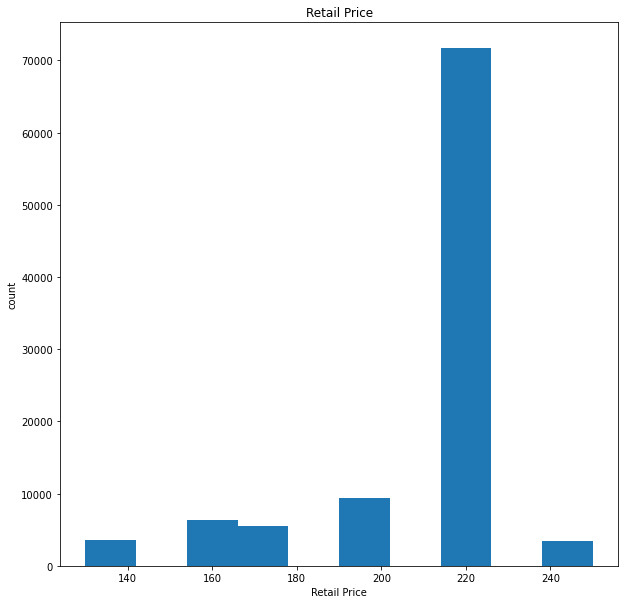

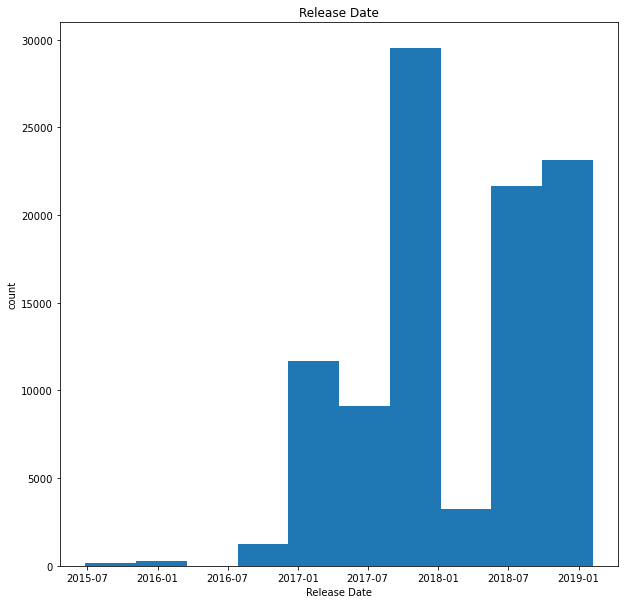

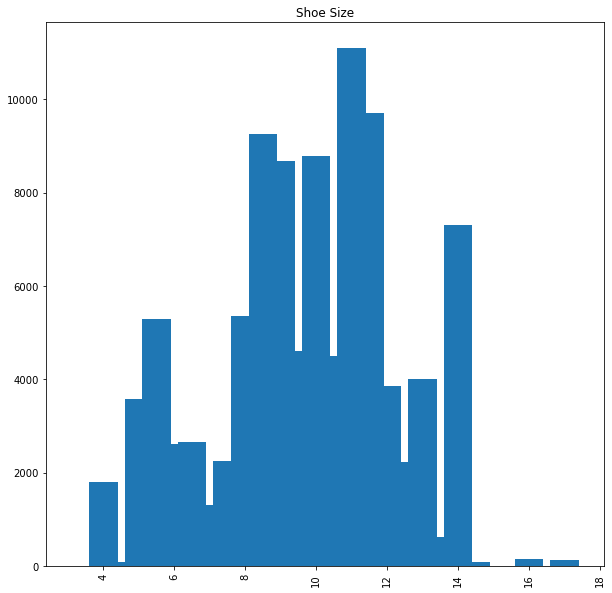

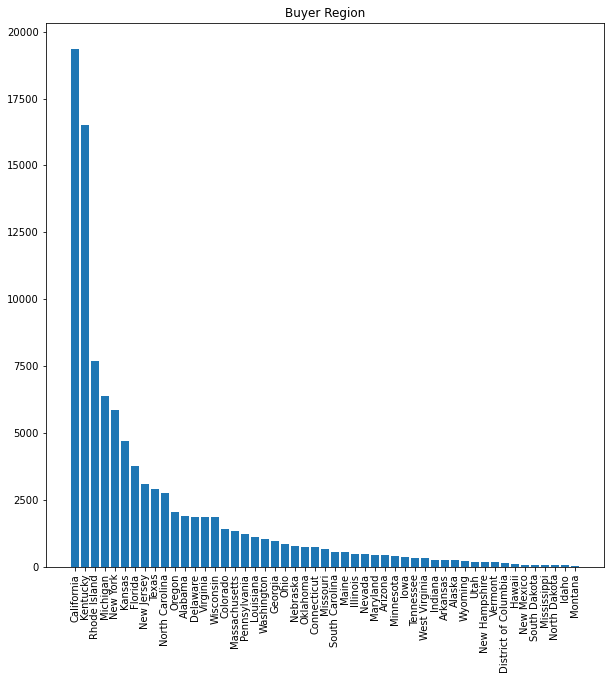

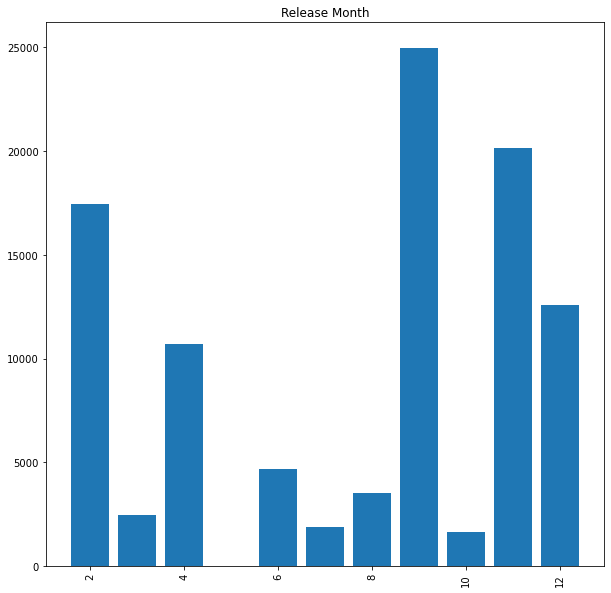

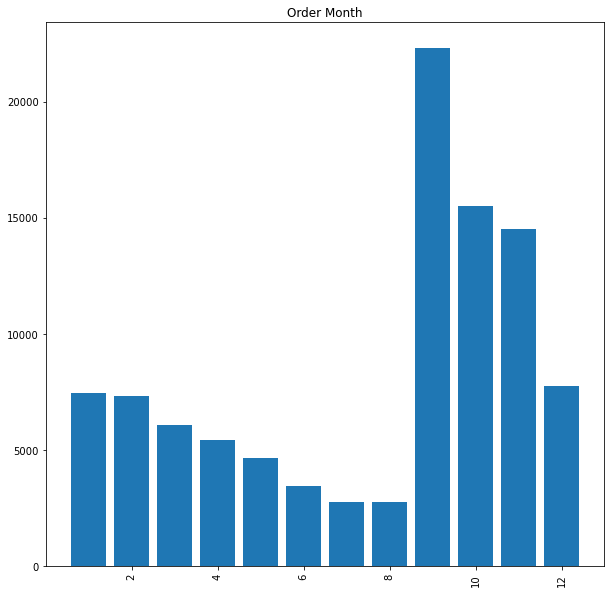

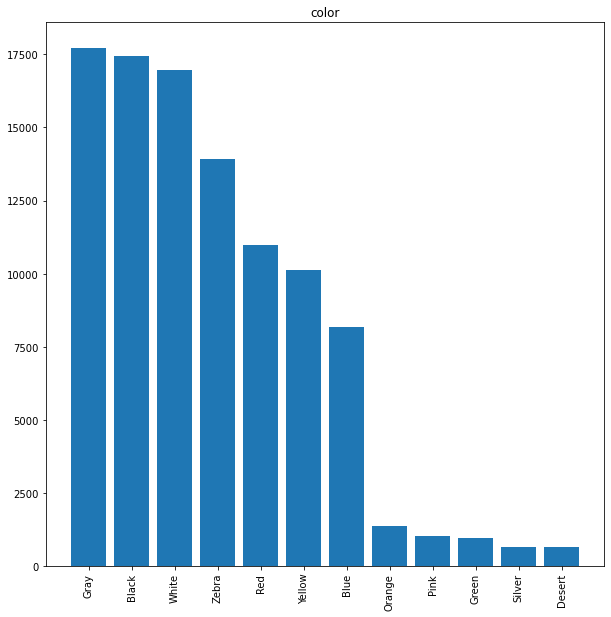

In [9]:
def plot_cols(df,cont_cols):
    columns = df.columns
    for col in columns:
        if col in cont_cols:
            print(df[col].describe(),'\n')
            plt.figure(figsize = (10,10))
            plt.hist(df[col])
            plt.xlabel(col)
            plt.ylabel('count')
            plt.title(col)
        else:
            c = df[col].unique()
            print(df[col].value_counts(),'\n')
            plt.figure(figsize =(10,10))
            plt.bar(c,df[col].value_counts())
            plt.xticks(rotation = 90)
            plt.title(col)
cont_cols = ['Sale Price','Retail Price','Order Date','Release Date']
plot_cols(df,cont_cols)

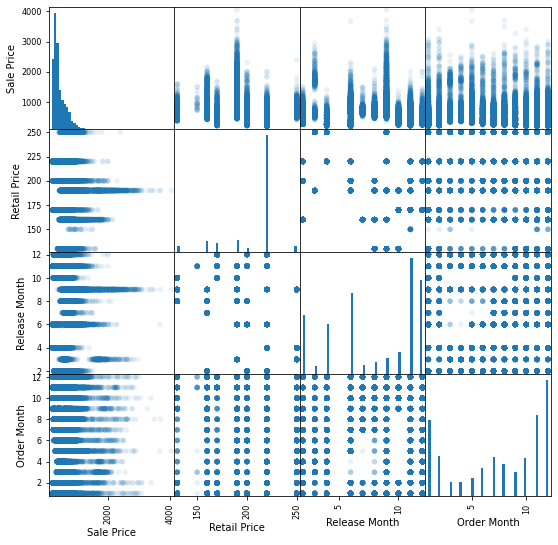

In [10]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

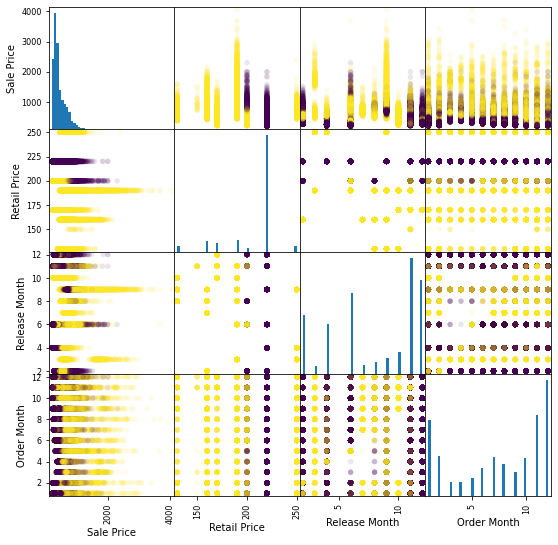

In [11]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9),c = pd.get_dummies(df['Brand']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

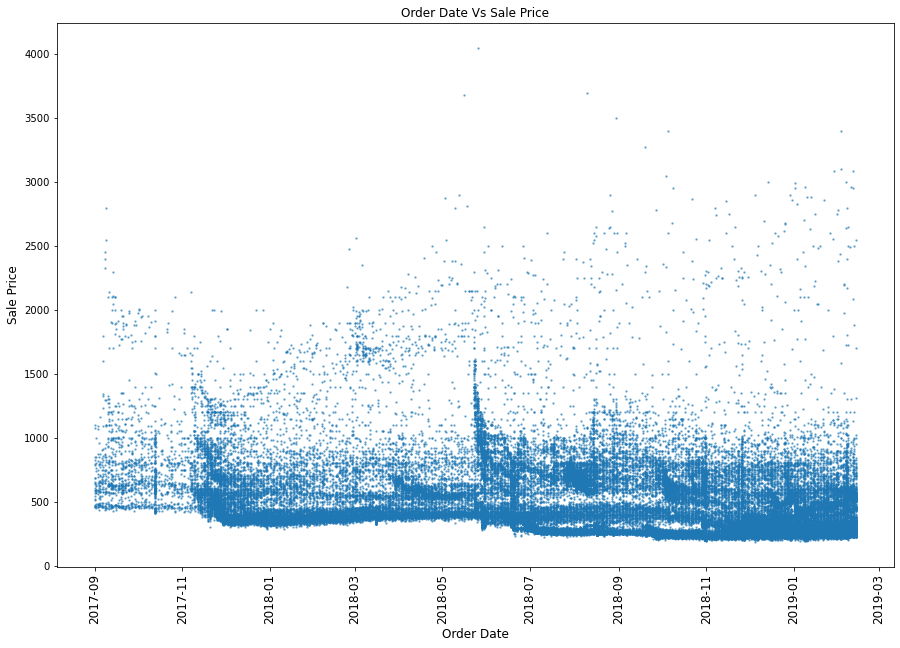

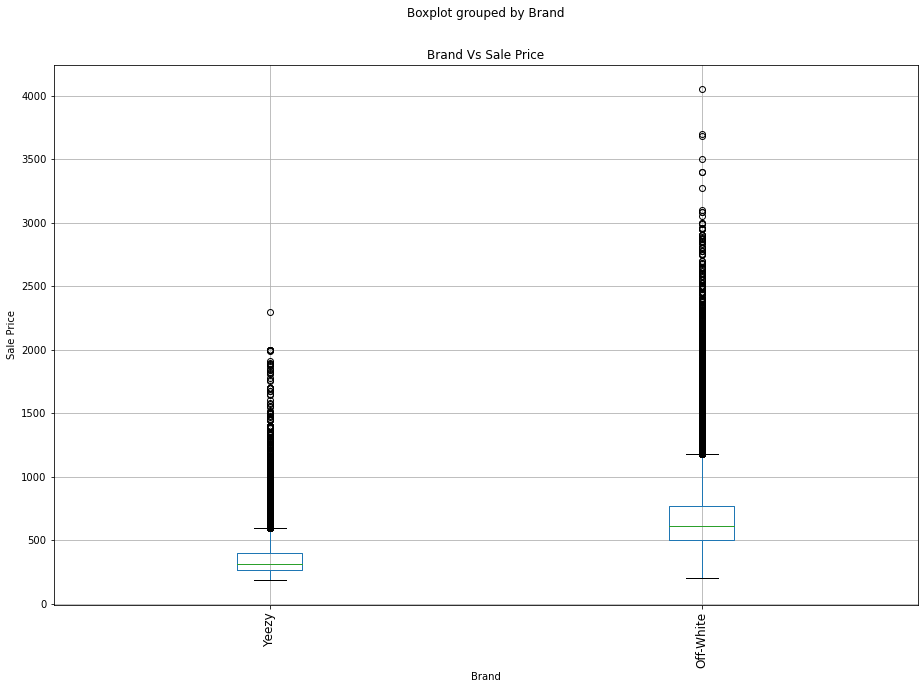

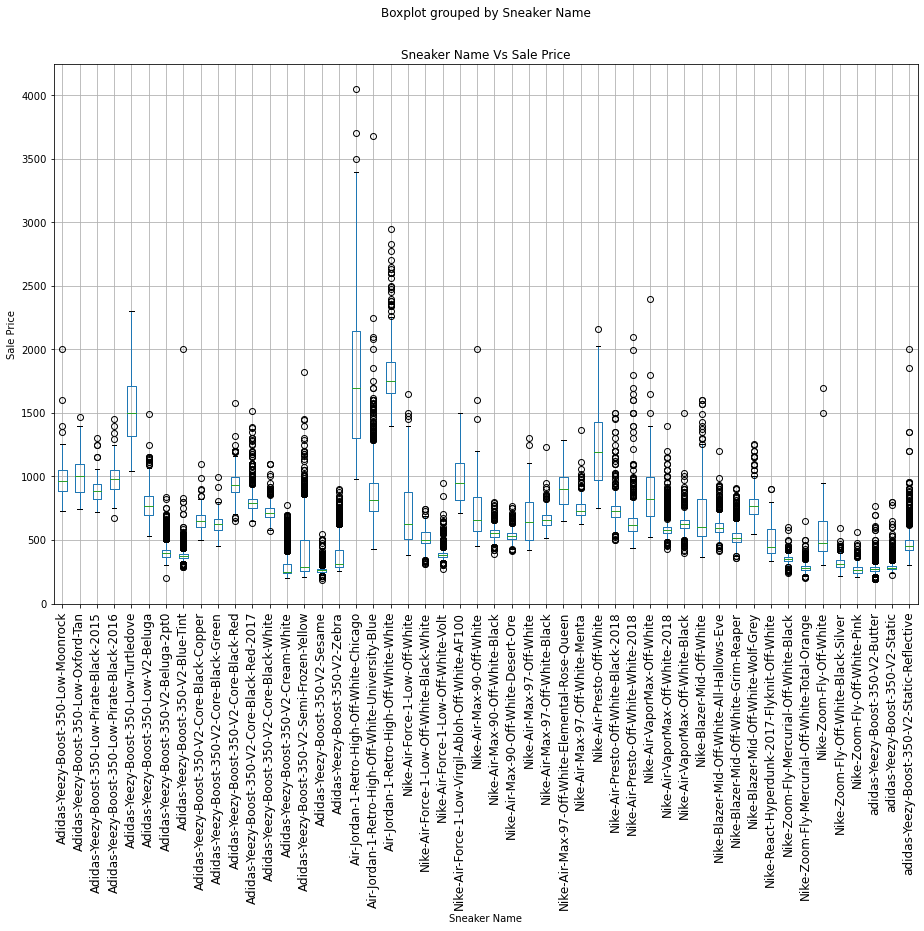

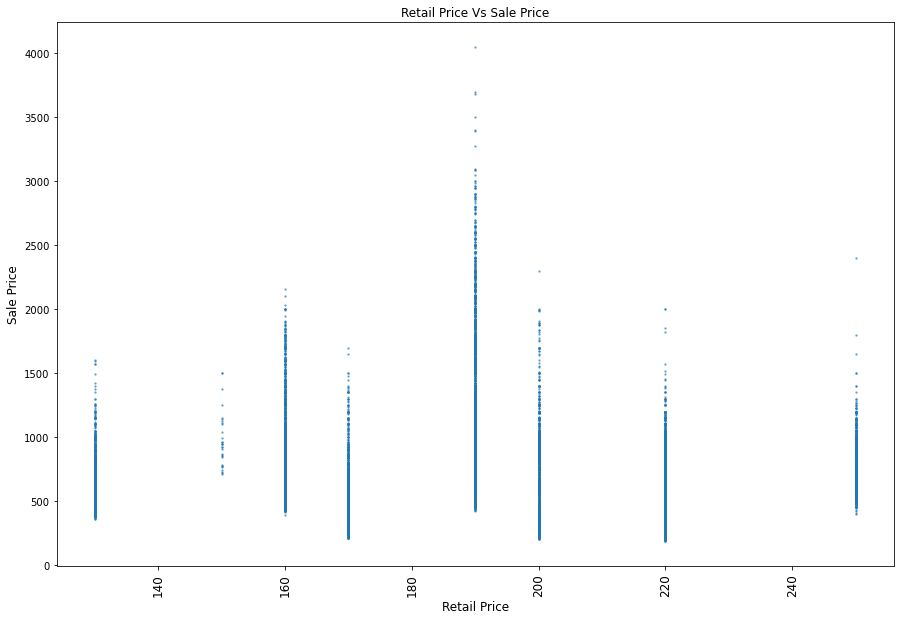

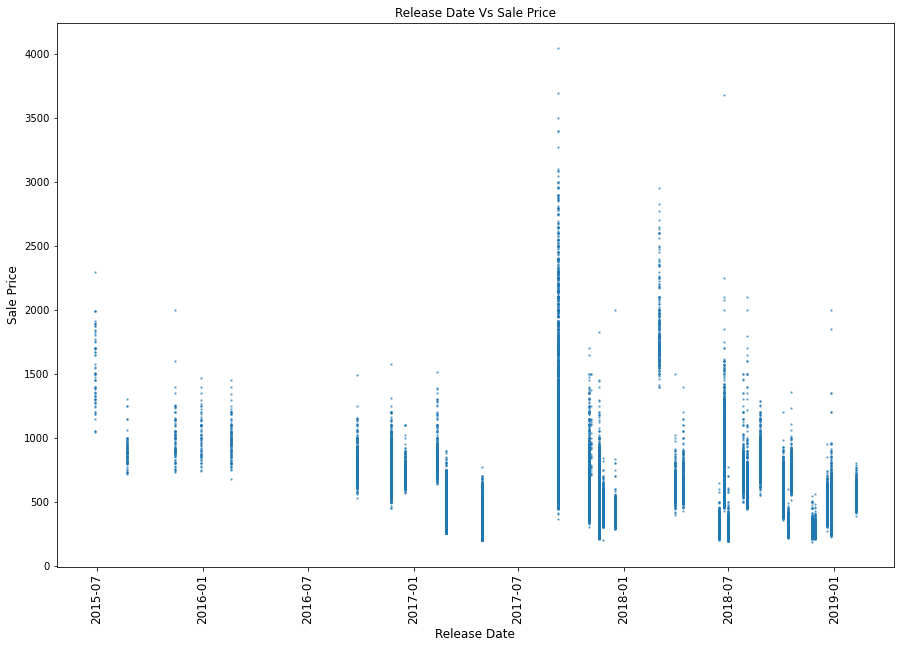

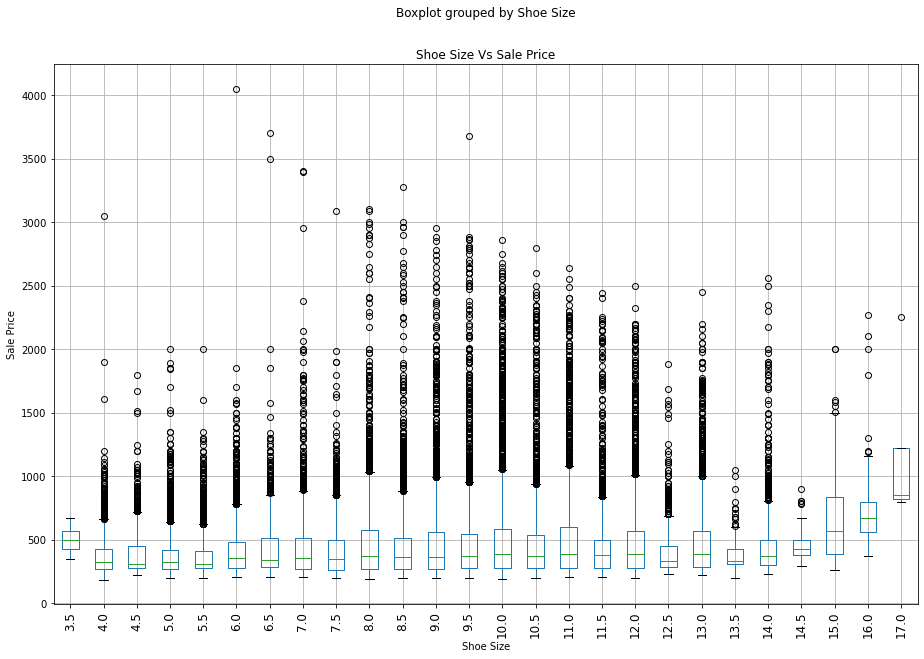

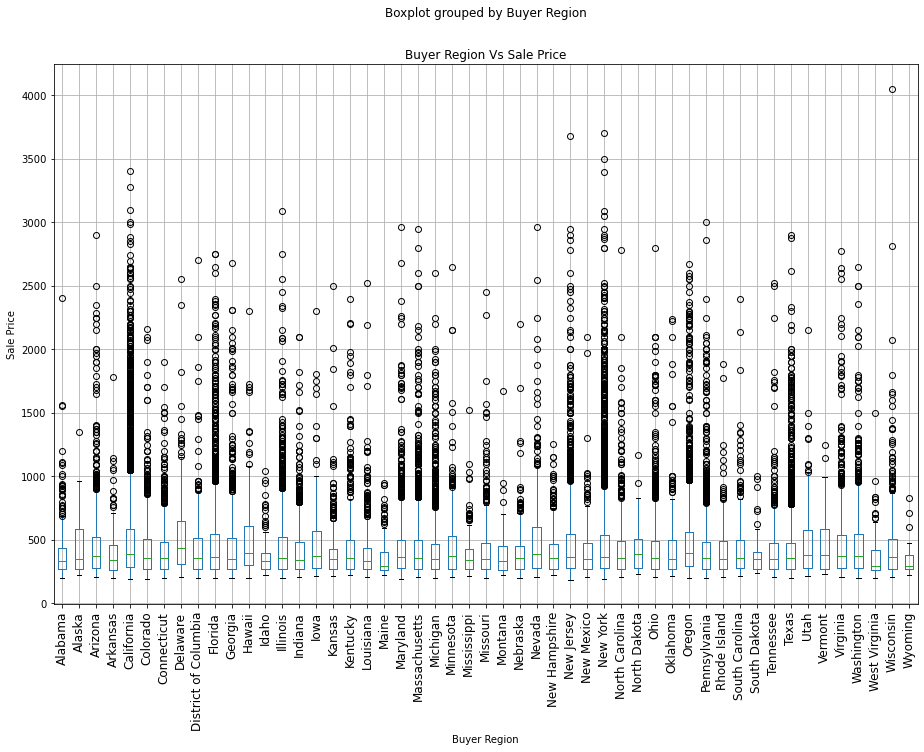

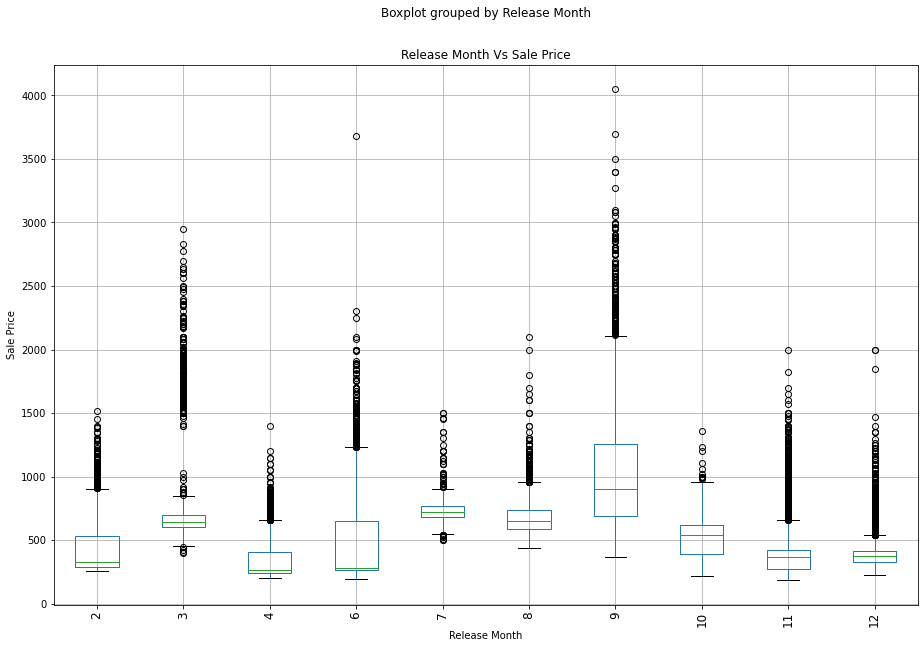

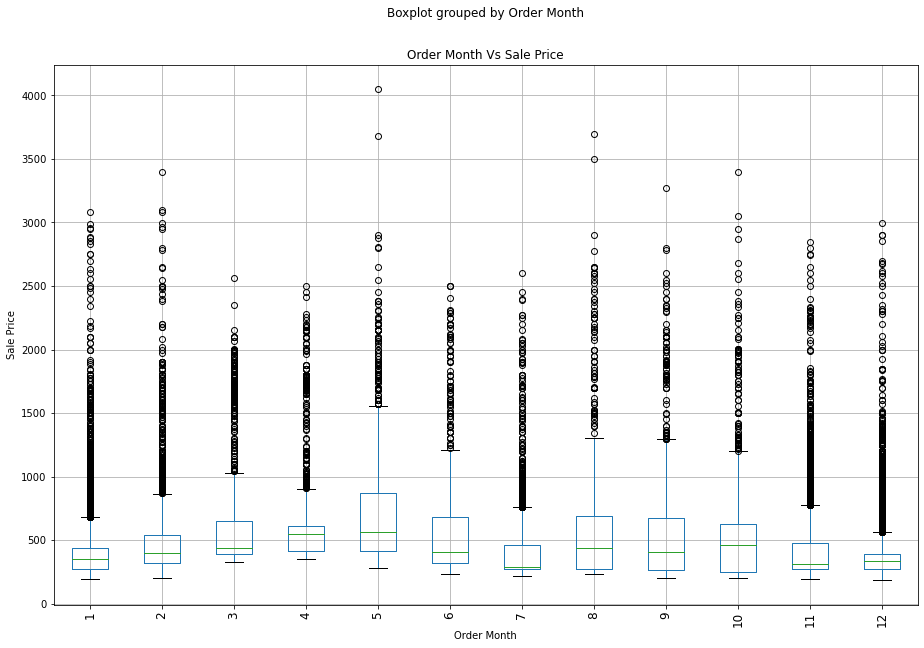

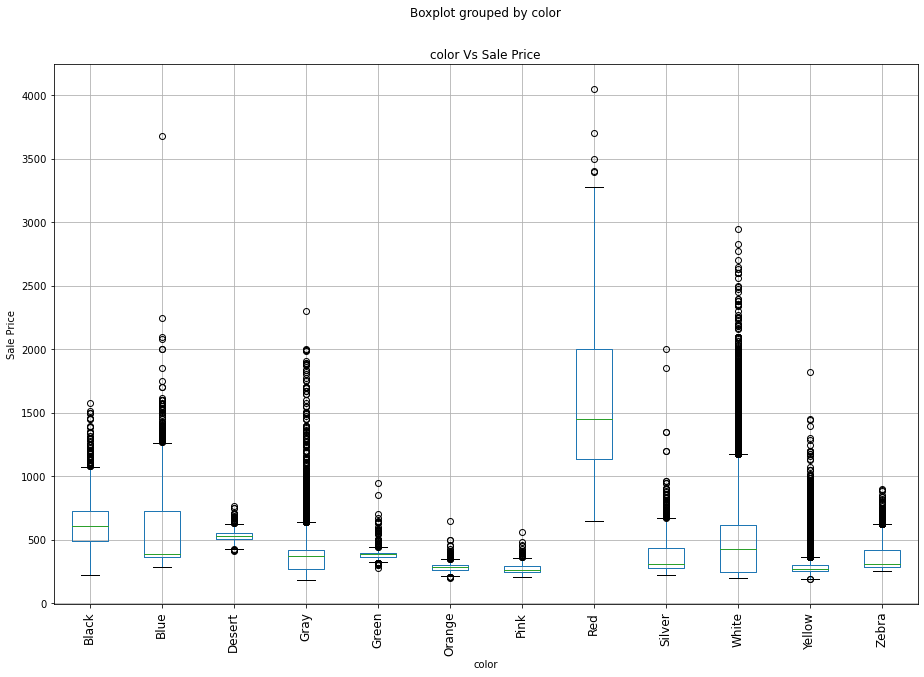

In [12]:
def plot_two_columns(df,cont_columns,target):
    tar = df[target]
    columns = df.columns
    for col in df.columns[df.columns !=target]:
        if col in cont_columns:
            plt.figure(figsize=[15,10])
            plt.scatter(df[col], df[target],s=2,alpha = 0.5)
            plt.xlabel(col,fontsize = 12)
            plt.ylabel(target,fontsize = 12)
            plt.title(col+' Vs '+ target,fontsize = 12)
            plt.xticks(rotation = 90, fontsize = 12)
            plt.show()
        else:
            df[[target,col]].boxplot(by = col,figsize=(15,10))
            plt.ylabel(target)
            plt.xlabel(col)
            plt.xticks(rotation = 90, fontsize = 12)
            plt.title(col+' Vs '+ target,fontsize = 12)
            plt.show()
cont_cols = ['Sale Price','Retail Price','Order Date','Release Date']
plot_two_columns(df,cont_cols,'Sale Price')
    

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     99956 non-null  datetime64[ns]
 1   Brand          99956 non-null  object        
 2   Sneaker Name   99956 non-null  object        
 3   Sale Price     99956 non-null  int64         
 4   Retail Price   99956 non-null  int64         
 5   Release Date   99956 non-null  datetime64[ns]
 6   Shoe Size      99956 non-null  float64       
 7   Buyer Region   99956 non-null  object        
 8   Release Month  99956 non-null  int64         
 9   Order Month    99956 non-null  int64         
 10  color          99956 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 8.4+ MB


In [14]:
print(df[df['Shoe Size'] > 14.5]['Sale Price'].mean())
print(df[df['Shoe Size'] < 14.5]['Sale Price'].mean())
print(df[df['Shoe Size'] > 14.5]['Sale Price'].median())
print(df[df['Shoe Size'] < 14.5]['Sale Price'].median())

710.1361502347418
446.0685336999167
620.0
370.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

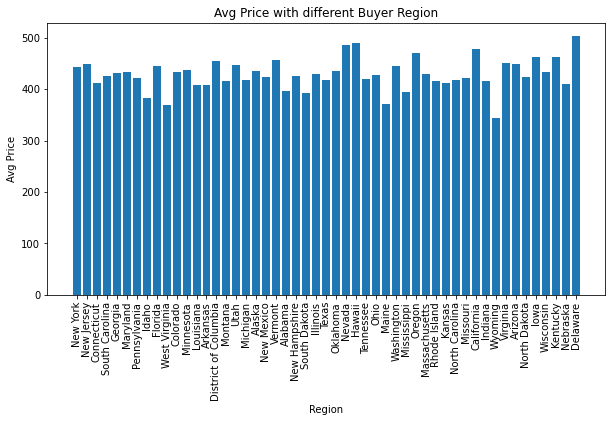

In [15]:
# Avg Sale Price vs Buyer Region
unique_region = set(df['Buyer Region'].values)
d = {}
for r in unique_region:
    d[r] = df[df['Buyer Region']==r][['Sale Price']].apply(np.average)
d1 = pd.DataFrame(d).T
plt.figure(figsize = [10,5])
plt.bar(d1.index,d1['Sale Price'].values)
plt.xlabel('Region')
plt.ylabel('Avg Price')
plt.title('Avg Price with different Buyer Region')
plt.xticks(rotation = 90,fontsize = 10)

<AxesSubplot:xlabel='color'>

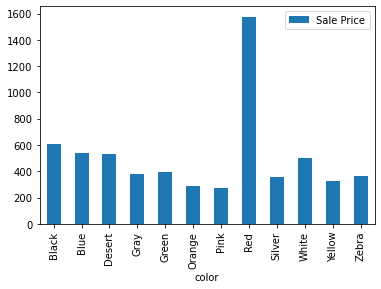

In [16]:
df[['color','Sale Price']].groupby('color').mean().plot.bar()

In [17]:
#Data Preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Date     99956 non-null  datetime64[ns]
 1   Brand          99956 non-null  object        
 2   Sneaker Name   99956 non-null  object        
 3   Sale Price     99956 non-null  int64         
 4   Retail Price   99956 non-null  int64         
 5   Release Date   99956 non-null  datetime64[ns]
 6   Shoe Size      99956 non-null  float64       
 7   Buyer Region   99956 non-null  object        
 8   Release Month  99956 non-null  int64         
 9   Order Month    99956 non-null  int64         
 10  color          99956 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(4)
memory usage: 8.4+ MB


In [18]:
from sklearn.model_selection import train_test_split
X = df.drop('Sale Price',axis = 1 )
X = X.drop('Order Date',axis = 1 )
X = X.drop('Release Date',axis = 1)
y = df['Sale Price']

In [28]:
X_train,X_other,y_train,y_other = train_test_split(X,y,train_size = 0.6,shuffle = True, random_state = 42)
X_val,X_test,y_val,y_test = train_test_split(X_other,y_other,train_size = 0.5, shuffle =True,  random_state=42)
X_train
print(X_train['Brand'].value_counts(normalize = True))
print(X_val['Brand'].value_counts(normalize = True))
print(X_test['Brand'].value_counts(normalize = True))

 Yeezy       0.723159
Off-White    0.276841
Name: Brand, dtype: float64
 Yeezy       0.722175
Off-White    0.277825
Name: Brand, dtype: float64
 Yeezy       0.718037
Off-White    0.281963
Name: Brand, dtype: float64


In [32]:
# Converting categorical data to numerical
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

object_cols = ['Brand','Sneaker Name', 'Buyer Region','color']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_val[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_val.index
OH_cols_test.index = X_test.index

# Adding the column names after one hot encoding
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_test.columns = OH_encoder.get_feature_names(object_cols)

# Remove one hot columns 
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_val.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

# Apply standard Scaler to each column with categorical data
SS = StandardScaler()
object_col2 = ['Retail Price']
num_cols_train = pd.DataFrame(SS.fit_transform(X_train[object_col2]))
num_cols_val = pd.DataFrame(SS.transform(X_val[object_col2]))
num_cols_test = pd.DataFrame(SS.transform(X_test[object_col2]))

# standard scaler  removed index; put it back
num_cols_train.index = X_train.index
num_cols_val.index =X_val.index
num_cols_test.index =X_test.index

num_cols_train.columns = object_col2
num_cols_val.columns = object_col2
num_cols_test.columns = object_col2

# Adding the column names after standard scaler
OH_X_train2 = OH_X_train.drop(object_col2,axis=1)
OH_X_val2 = OH_X_valid.drop(object_col2,axis=1)
OH_X_test2 = OH_X_test.drop(object_col2,axis=1)

OH_X_train3 = pd.concat([num_cols_train, OH_X_train2], axis=1)
OH_X_valid3 = pd.concat([num_cols_val, OH_X_val2], axis=1)
OH_X_test3 = pd.concat([num_cols_test, OH_X_test2], axis=1)

#MinMax Scaler Process
MM = MinMaxScaler()
object_col3 = ['Order Month','Release Month','Shoe Size']
MM_num_cols_train = pd.DataFrame(MM.fit_transform(X_train[object_col3]))
MM_num_cols_val = pd.DataFrame(MM.transform(X_val[object_col3]))
MM_num_cols_test = pd.DataFrame(MM.transform(X_test[object_col3]))

MM_num_cols_train.index = X_train.index
MM_num_cols_val.index =X_val.index
MM_num_cols_test.index =X_test.index

MM_num_cols_train.columns = object_col3
MM_num_cols_val.columns = object_col3
MM_num_cols_test.columns = object_col3

OH_X_train3 = OH_X_train3.drop(object_col3,axis=1)
OH_X_val3 = OH_X_valid3.drop(object_col3,axis=1)
OH_X_test3 = OH_X_test3.drop(object_col3,axis=1)

X_train_Final = pd.concat([MM_num_cols_train, OH_X_train3], axis=1)
X_valid_Final = pd.concat([MM_num_cols_val, OH_X_val3], axis=1)
X_tess_Final = pd.concat([MM_num_cols_test, OH_X_test3], axis=1)



In [33]:
X_train_Final

,Order Month,Release Month,Shoe Size,Retail Price,Brand_ Yeezy,Brand_Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,...,color_Desert,color_Gray,color_Green,color_Orange,color_Pink,color_Red,color_Silver,color_White,color_Yellow,color_Zebra
78430,1.000000,0.9,0.148148,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
89470,0.000000,1.0,0.444444,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
64830,0.909091,0.0,0.481481,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39568,0.545455,0.9,0.518519,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49391,0.727273,0.5,0.407407,-1.934602,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.000000,0.9,0.370370,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54886,0.818182,0.0,0.185185,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76820,1.000000,0.9,0.148148,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
860,0.818182,0.2,0.444444,0.447166,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
X_train_Final.shape

(59973, 119)